In [1]:
import pandas as pd

# Load datasets
cola_results = pd.read_csv('Results/cola_results.csv')
mnli_results = pd.read_csv('Results/mnli_results.csv')
mrpc_results = pd.read_csv('Results/mrpc_results.csv')
sst2_results = pd.read_csv('Results/sst2_results.csv')

expected_responses_cola = ['acceptable', 'unacceptable']
expected_responses_sst2 = ['positive', 'negative']
expected_responses_mrpc = ['paraphrase', 'not paraphrase']
expected_responses_mnli = ['entailment', 'neutral', 'contradiction']

# Define mapping from string to numerical labels
label_mapping_cola = {'acceptable': 1, 'unacceptable': 0}
label_mapping_sst2 = {'positive': 1, 'negative': 0}
label_mapping_mrpc = {'paraphrase': 1, 'not paraphrase': 0}
label_mapping_mnli = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Function to invert labels for SST-2 if incorrect
def invert_sst2_label(label, actual_label):
    if label in expected_responses_sst2:
        return label_mapping_sst2[label]
    else:
        return 1 - actual_label  # Opposite label (0 -> 1, 1 -> 0)
    

# Convert predicted labels to numerical and handle incorrect responses
cola_results['predicted_label'] = cola_results['predicted_label'].apply(lambda x: label_mapping_cola[x] if x in expected_responses_cola else -1)

# Identify incorrect predictions and invert them
sst2_results['predicted_label'] = sst2_results.apply(lambda row: label_mapping_sst2[row['predicted_label']] if row['predicted_label'] in expected_responses_sst2 else 1 - row['actual_label'], axis=1)

mrpc_results['predicted_label'] = mrpc_results['predicted_label'].apply(lambda x: label_mapping_mrpc[x] if x in expected_responses_mrpc else -1)

mnli_results['predicted_label'] = mnli_results['predicted_label'].apply(lambda x: label_mapping_mnli[x] if x in expected_responses_mnli else -1)


In [2]:
cola_errors = (cola_results['actual_label'] != cola_results['predicted_label']).astype(int)
sst2_errors = (sst2_results['actual_label'] != sst2_results['predicted_label']).astype(int)
mrpc_errors = (mrpc_results['actual_label'] != mrpc_results['predicted_label']).astype(int)
mnli_errors = (mnli_results['actual_label'] != mnli_results['predicted_label']).astype(int)

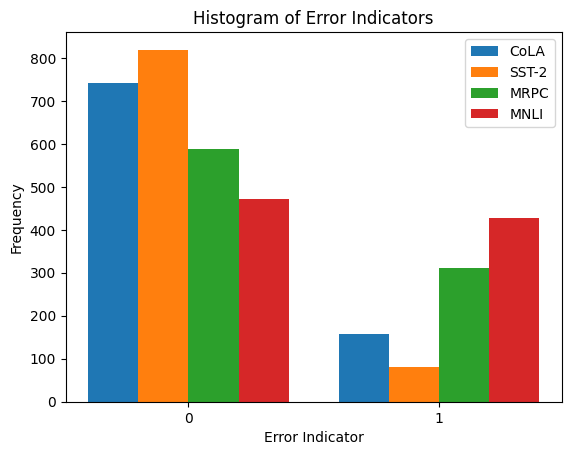

In [7]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

plt.hist([cola_errors, sst2_errors, mrpc_errors, mnli_errors], 
         bins=np.arange(-0.5, 2, 1),  # Bins from -0.5 to 1.5 to center around 0 and 1
         label=['CoLA', 'SST-2', 'MRPC', 'MNLI'], 
         rwidth=0.8)  # Adjust width for better visual separation
plt.xticks([0, 1])  # Explicitly set x-ticks to 0 and 1
plt.xlabel('Error Indicator')
plt.ylabel('Frequency')
plt.title('Histogram of Error Indicators')
plt.legend(loc='upper right')
plt.show()

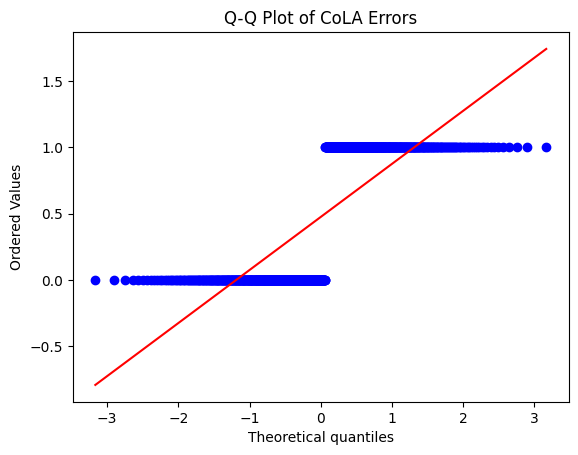

In [9]:
stats.probplot(mnli_errors, dist="norm", plot=plt)
plt.title('Q-Q Plot of CoLA Errors')
plt.show()

In [10]:
cola_stat, cola_p_value = stats.shapiro(cola_errors)
print(f"Shapiro-Wilk Test for CoLA Errors: Statistic={cola_stat:.3f}, p-value={cola_p_value:.3f}")

sst2_stat, sst2_p_value = stats.shapiro(sst2_errors)
print(f"Shapiro-Wilk Test for SST-2 Errors: Statistic={sst2_stat:.3f}, p-value={sst2_p_value:.3f}")

mrpc_stat, mrpc_p_value = stats.shapiro(mrpc_errors)
print(f"Shapiro-Wilk Test for MRPC Errors: Statistic={mrpc_stat:.3f}, p-value={mrpc_p_value:.3f}")

mnli_stat, mnli_p_value = stats.shapiro(mnli_errors)
print(f"Shapiro-Wilk Test for MNLI Errors: Statistic={mnli_stat:.3f}, p-value={mnli_p_value:.3f}")

Shapiro-Wilk Test for CoLA Errors: Statistic=0.461, p-value=0.000
Shapiro-Wilk Test for SST-2 Errors: Statistic=0.322, p-value=0.000
Shapiro-Wilk Test for MRPC Errors: Statistic=0.601, p-value=0.000
Shapiro-Wilk Test for MNLI Errors: Statistic=0.636, p-value=0.000


In [11]:
sst2_stat, sst2_p_value = stats.kstest(sst2_errors, 'norm', alternative='two-sided')
print(f"Kolmogorov-Smirnov Test for SST-2 Errors: Statistic={sst2_stat:.3f}, p-value={sst2_p_value:.3f}")

Kolmogorov-Smirnov Test for SST-2 Errors: Statistic=0.500, p-value=0.000
